# Olympic Games Analysis

**Overview:**

This notebook contains an analysis of the Olympic Games data, focusing on various aspects such as athlete performance, demographic information, and country-specific statistics. The data used in this analysis was obtained from Kaggle.

### Preliminaries

Just import the libraries that will be needed throughout the assignment.

In [1]:
# imports pandas
import pandas as pd

import os

import matplotlib.pyplot as plt

## Datasets

For solving the questions posed, you have the following datasets available.

### Olympic Games Data

Data from the Olympic Games, for the period considered, were collected for each individual athlete in a given Olympic event (or race) and recorded in the file `athlete_events.csv`. For example, the following entry is for the first gold medal won by a Portuguese woman:

| |ID |Name |Sex |Age |Height |Weight |Team |NOC |Games |Year |Season |City |Sport |Event |Medal|
|---|---|-------|-------|-------|-------|-------|- ------|-------|-------|-------|-------|-------|--- ----|-----------|-----|
|164334 |82494 |Rosa Mara Correia dos Santos Mota |F |30 |157 |45 |Portugal |POR |1988 Summer |1988 |Summer |Seoul |Athletics |Athletics Women's Marathon |Gold|

The file structure is illustrated in the figure below:

![Olympic Games Data](../imgs/raw_athlete_events.png)

As can be seen, various information is recorded for each individual athlete in a given Olympic event, such as name (`Name`), gender (`Sex`), age (`Age`), edition of the Olympic Games (`Games `), the Olympic event (`Event`) among others. It should be noted that, for each athlete, there is an identifier (`ID`) that is unique to that athlete and invariable - it remains for all Olympic events in which that athlete has participated, regardless of the edition (year).

Regarding Olympic events, there are individual events and team events - e.g. football and the 4x100m relay are team events. In team events, the data includes one record for each athlete on the team.

### Population

CSV file `population.csv` includes information about the population of each country for a given year.

The csv file includes ISO3 code of the country (in lower case) (`geo`), the name of the country (`name`), the year (`time`) and the population (`population`).

### Country codes

CSV file `codes.csv` includes information about the different codes used for different countries.

The csv file includes, among other, the name of the country (`Country`), ISO3 code (`ISO3`) and the national olympic code (`IOC`).


The following code loads the datasets.

In [2]:
dataFileName = os.path.join( "..", "data", "athlete_events.csv")

dataDF = pd.read_csv(dataFileName)

print(dataDF.head(5))

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [3]:
codesFileName = os.path.join("..", "data", "codes.csv")

codesDF = pd.read_csv(codesFileName)

print(codesDF.head(5))

          Country ISO2 ISO3   ISON  IOC FIPS Plates Domain
0     Afghanistan   AF  AFG    4.0  AFG   AF    AFG    .af
1   Åland Islands   AX  ALA  248.0  NaN  NaN     AX    .ax
2         Albania   AL  ALB    8.0  ALB   AL     AL    .al
3         Algeria   DZ  DZA   12.0  ALG   AG     DZ    .dz
4  American Samoa   AS  ASM   16.0  ASA   AQ    USA    .as


In [4]:
populationFileName = os.path.join("..", "data", "population.csv")

populationDF = pd.read_csv(populationFileName)

print(populationDF.head(5))

   geo         name  time  Population
0  afg  Afghanistan  1800   3280000.0
1  afg  Afghanistan  1801   3280000.0
2  afg  Afghanistan  1802   3280000.0
3  afg  Afghanistan  1803   3280000.0
4  afg  Afghanistan  1804   3280000.0


For data on atheletes, there are some information missing. We can compute the number of entries missing using the following code.

**NOTE:** the missing information on Medal is expected - it just means that the athlete has won no medal in the event.

In [5]:
dataDF.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

**GENERAL NOTE:** In your computations, if there are rows for which needed information is missing, just drop the rows.

## Question 1 (7 points)

In this question, we start by exploring the data available with simple queries. In your answers, you can use the data computed in the previous answers if and when useful.


### **1.a)** How many athletes have participated in Summer Olympics and how many athlete participated in Winter Olympics?


In [6]:
summer = dataDF[dataDF["Season"]=="Summer"]["ID"].nunique() 
print( "summer")
print( summer)
winter = dataDF[dataDF["Season"]=="Winter"]["ID"].nunique() 
print( "winter")
print( winter)

summer
116776
winter
18958


### **1.b)** Who are the three youngest and oldest athletes that won a Gold medal in the Olympic games?

Show the following information about each athelete: Name, Age, Team, Games, Sport and Event.

In [7]:
highest = dataDF[dataDF["Medal"] == "Gold"][["Name","Age","Team","Games","Sport","Event" ]].nlargest(3,"Age")
print( "Oldest athletes")
print( highest)
lowest = dataDF[dataDF["Medal"] == "Gold"][["Name","Age","Team","Games","Sport","Event"] ].nsmallest(3,"Age")
print( "Youngest athletes")
print( lowest)
# NOTE: this does not show other atheletes if there are more atheletes # with the same age

Oldest athletes
                        Name   Age           Team        Games  \
105199       Charles Jacobus  64.0  United States  1904 Summer   
233390     Oscar Gomer Swahn  64.0         Sweden  1912 Summer   
104003  Isaac Lazarus Israls  63.0    Netherlands  1928 Summer   

                   Sport                                             Event  
105199             Roque                               Roque Men's Singles  
233390          Shooting  Shooting Men's Running Target, Single Shot, Team  
104003  Art Competitions        Art Competitions Mixed Painting, Paintings  
Youngest athletes
                                     Name   Age           Team        Games  \
27207                       Hans Bourquin  13.0    Switzerland  1928 Summer   
52010  Donna Elizabeth de Varona (-Pinto)  13.0  United States  1960 Summer   
73581                          Fu Mingxia  13.0          China  1992 Summer   

          Sport                                            Event  
27207    

### 1.c) Who are the top-10 athletes that have won more Gold medals in the Olympic Games?



In [8]:
won = dataDF[(dataDF["Medal"] == "Gold")][["ID","Name","Medal"]].groupby("ID").agg({"Name":"first","Medal":"count"})
best = won.nlargest(10,["Medal"]) 
print(best)

                                      Name  Medal
ID                                               
94406              Michael Fred Phelps, II     23
33557          Raymond Clarence "Ray" Ewry     10
67046   Larysa Semenivna Latynina (Diriy-)      9
69210       Frederick Carlton "Carl" Lewis      9
87390                 Paavo Johannes Nurmi      9
113912                   Mark Andrew Spitz      9
11642       Matthew Nicholas "Matt" Biondi      8
11951                  Ole Einar Bjrndalen      8
13029                   Usain St. Leo Bolt      8
35550               Birgit Fischer-Schmidt      8


### 1.d) For Summer Olympics, after 1950, who are the athletes that have won more medals in each edition?

Show the following information: Year, Name of athlete, and number of medals.

In [9]:
won = dataDF[(~dataDF["Medal"].isna())&(dataDF["Year"]>1950)&(dataDF["Season"]=="Summer" )][["ID","Name","Medal","Year"]]\
                .groupby(["ID","Year"]).agg({"Name":"first","Medal":"count"}) 
byyear = won.reset_index().groupby("Year").apply(lambda p: p.nlargest(1,["Medal"])) 
byyear = byyear.set_index("Year").drop(columns=["ID"])
print(byyear)

                                    Name  Medal
Year                                           
1952      Mariya Kindrativna Horokhovska      7
1956           gnes Keleti-Srkny (Klein)      6
1960         Borys Anfiyanovych Shakhlin      7
1964  Larysa Semenivna Latynina (Diriy-)      6
1968         Mikhail Yakovlevich Voronin      7
1972                   Mark Andrew Spitz      7
1976        Nikolay Yefimovich Andrianov      7
1980     Aleksandr Nikolayevich Dityatin      8
1984                             Li Ning      6
1988      Matthew Nicholas "Matt" Biondi      7
1992       Vitaly Venediktovich Shcherbo      6
1996             Aleksey Yuryevich Nemov      6
2000             Aleksey Yuryevich Nemov      6
2004             Michael Fred Phelps, II      8
2008             Michael Fred Phelps, II      8
2012             Michael Fred Phelps, II      6
2016             Michael Fred Phelps, II      6


### 1.e) For each athlete, compute the number of gold, silver and bronze medals she/he has won.

**Suggestions:** two alternative suggestion are investigating pivot tables and custom defined aggregation functions.


In [13]:
filtered_df = dataDF[["ID", "Name", "Medal"]]

# Create a pivot table 
medals_pivot = filtered_df.pivot_table(index=["ID", "Name"], columns="Medal", aggfunc="size", fill_value=0)
medals_pivot = medals_pivot[['Gold', 'Silver', 'Bronze']]

top_athletes = medals_pivot.sort_values(by=["Gold", "Silver", "Bronze"], ascending=False).head(10)
print(top_athletes)


Medal                                                   Gold  Silver  Bronze
ID     Name                                                                 
94406  Michael Fred Phelps, II                            23       3       2
33557  Raymond Clarence "Ray" Ewry                        10       0       0
67046  Larysa Semenivna Latynina (Diriy-)                  9       5       4
87390  Paavo Johannes Nurmi                                9       3       0
113912 Mark Andrew Spitz                                   9       1       1
69210  Frederick Carlton "Carl" Lewis                      9       1       0
11951  Ole Einar Bjrndalen                                 8       4       1
35550  Birgit Fischer-Schmidt                              8       4       0
57998  Sawao Kato                                          8       3       1
119922 Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     8       3       1


### 1.f) For the games of 2016, print the table of medals for each country.

**NOTE:** for collective events (e.g. football, 4*100 meters), you should count only one medal for a given event.
In the cell after the code, explain the rationale of the code to achieve this goal - your solution does not need to be perfect, but only an approximation of the real value.

In [14]:
medals2016_2 = dataDF[(dataDF["Year"]==2016)&(~dataDF["Medal"].isna())]

# Better solution... findout event that have more than 5 medals as those that are collective
events2016 = medals2016_2[["Event","ID"]].groupby("Event").count()
events2016["TeamEvent"] = events2016["ID"] > 5
events2016 = events2016[["TeamEvent"]]

medals2016_2 = medals2016_2.join( events2016, on="Event")

medals2016_2c = medals2016_2[medals2016_2["TeamEvent"]].groupby(["Medal","Event"]).first ().reset_index()
medals2016_2 = pd.concat([medals2016_2c,medals2016_2[~medals2016_2["TeamEvent"]]])

medals2016_2 = medals2016_2[["NOC","Medal","ID"]].groupby(["NOC","Medal"]).count().reset_index()
medals2016_2 = medals2016_2.pivot(index="NOC",columns="Medal",values="ID")
medals2016_2 = medals2016_2.fillna(0)
medals2016_2 = medals2016_2[["Gold","Silver","Bronze"]] 

print(medals2016_2.nlargest(10,["Gold","Silver","Bronze"]))

Medal  Gold  Silver  Bronze
NOC                        
USA    46.0    37.0    38.0
GBR    27.0    23.0    17.0
CHN    26.0    18.0    26.0
RUS    19.0    17.0    20.0
GER    17.0    10.0    15.0
JPN    12.0     8.0    21.0
FRA    10.0    18.0    14.0
KOR     9.0     3.0     9.0
ITA     8.0    12.0     8.0
AUS     8.0    11.0    10.0


**Rationale:** 
The solution aims to generate a table of medals won by each country during the 2016 Olympic Games, ensuring that team events are counted only once. First, the dataset is filtered to include only the 2016 data where medals were awarded. The solution then identifies team events by assuming that events with more than five participants are likely team events, based on the grouped participant count per event. This team event information is merged back into the original dataset. For team events, the solution keeps only the first occurrence of each team event-medal combination, effectively counting each team event once. The dataset is then grouped by country and medal type, counting the number of medals per type for each country. A pivot table is created to restructure the data, with countries as rows and medal types (Gold, Silver, Bronze) as columns. Missing values are filled with zeros to handle countries that did not win certain types of medals. Finally, the columns are ordered as Gold, Silver, and Bronze, and the top ten countries by medal count are displayed. This method provides a reasonable approximation for counting team event medals while ensuring individual events are correctly counted.

## Question 2 (2 points)

It is normal that smaller countries conquer less medals, as their population is smaller.
In this question, we try to put the number of medals into prespective, considering the population of countries.


In [17]:
populationDF["geo"]=populationDF["geo"].str.upper()

population2016DF = populationDF[populationDF["time"]==2016]

medalsPerMillion = medals2016_2.join(codesDF.set_index("IOC"),how="inner").set_index("ISO3")\
                    .join(population2016DF.set_index("geo"),how="inner") 

medalsPerMillion["Gold1M"] = medalsPerMillion["Gold"] / (medalsPerMillion["Population"] / 1000000)
medalsPerMillion["Silver1M"] = medalsPerMillion["Silver"] / (medalsPerMillion["Population"] / 1000000)
medalsPerMillion["Bronze1M"] = medalsPerMillion["Bronze"] / (medalsPerMillion["Population"] / 1000000)

medalsPerMillion = medalsPerMillion[["name","Gold1M","Silver1M","Bronze1M"]] 

print(medalsPerMillion.nlargest(10,["Gold1M","Silver1M","Bronze1M"]))

            name    Gold1M  Silver1M  Bronze1M
BHS      Bahamas  2.525406  0.000000  2.525406
JAM      Jamaica  2.140797  1.070398  0.713599
HRV      Croatia  1.183782  0.710269  0.473513
FJI         Fiji  1.088885  0.000000  0.000000
NZL  New Zealand  0.856883  1.927987  1.071104
HUN      Hungary  0.815070  0.305651  0.407535
BHR      Bahrain  0.709390  0.709390  0.000000
GEO      Georgia  0.530348  0.265174  1.060696
SVN     Slovenia  0.478464  0.956929  0.478464
NLD  Netherlands  0.467167  0.408771  0.233583


## Question 3 (4 points)

This third question focus on processing the information on a time series for plotting it.

In [19]:
# will create a dataframe with medals per country in each edition 
# excluding duplicates

medalsAll = dataDF[(~dataDF["Medal"].isna())]

events = medalsAll[["Event","Year","ID"]].groupby(["Event","Year"]).count() 
events["TeamEvent"] = events["ID"] > 5
events = events[["TeamEvent"]]

medalsAll = medalsAll.join( events, on=["Event","Year"])

medalsNoDup = medalsAll[medalsAll["TeamEvent"]].groupby(["Medal","Event"]).first().reset_index()

medalsNoDup = pd.concat([medalsNoDup,medalsAll[~medalsAll["TeamEvent"]]])

print(medalsNoDup)

         Medal                                          Event      ID  \
0       Bronze  Archery Men's Target Archery, 28 metres, Team   15721   
1       Bronze                             Archery Men's Team   11799   
2       Bronze                       Archery Men's Team Round   15893   
3       Bronze                           Archery Women's Team    5233   
4       Bronze      Athletics Men's 1,600 metres Medley Relay   12639   
...        ...                                            ...     ...   
271010  Silver                Weightlifting Men's Lightweight  135521   
271032  Bronze                      Judo Women's Middleweight  135535   
271076    Gold                     Athletics Women's Shot Put  135553   
271078  Silver                     Athletics Women's Shot Put  135553   
271080  Bronze                     Athletics Women's Shot Put  135553   

                                       Name Sex   Age  Height  Weight  \
0                         Julien Louis Brul   M  4

### 3.a) Display the information about the number of athletes and medals wons by a country in the Olympic games over the years.

Select a country that has a significative number of medals and plot the results.
Discuss the rationale of your solution, including why you have decided to show the lines you are presenting and any processing you have done to the lines.


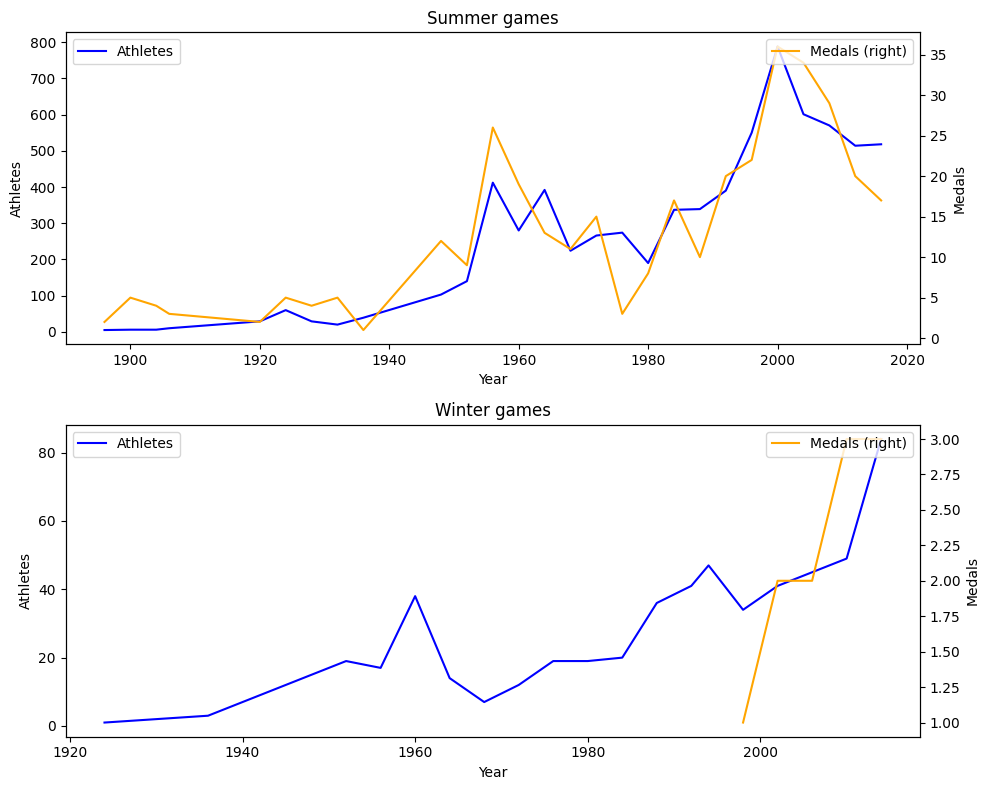

In [25]:
country = "AUS"

athletes = dataDF[dataDF["NOC"] == country][["Year", "Season", "ID"]]\
            .groupby(["Season", "Year"]).count().rename(columns={"ID": "Athletes"})
medals = medalsNoDup[medalsNoDup["NOC"] == country][["Year", "Season", "ID"]]\
            .groupby(["Season", "Year"]).count().rename(columns={"ID": "Medals"})

result = athletes.join(medals)

result = result.reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot Summer games
summer = result[result["Season"] == "Summer"]
ax1.plot(summer["Year"], summer["Athletes"], label="Athletes", color='blue')
ax1.set_ylabel("Athletes")
ax1.set_title("Summer games")
ax1.set_xlabel("Year")
ax1.legend(loc='upper left')

ax1_2 = ax1.twinx()
ax1_2.plot(summer["Year"], summer["Medals"], label="Medals (right)", color='orange')
ax1_2.set_ylabel("Medals")
ax1_2.legend(loc='upper right')

# Plot Winter games
winter = result[result["Season"] == "Winter"]
ax2.plot(winter["Year"], winter["Athletes"], label="Athletes", color='blue')
ax2.set_ylabel("Athletes")
ax2.set_title("Winter games")
ax2.set_xlabel("Year")
ax2.legend(loc='upper left')

ax2_2 = ax2.twinx()
ax2_2.plot(winter["Year"], winter["Medals"], label="Medals (right)", color='orange')
ax2_2.set_ylabel("Medals")
ax2_2.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Rationale:** 
The solution aims to visualize the number of athletes and medals won by the USA in both the Summer and Winter Olympic Games over the years, ensuring clarity and accuracy. Initially, the dataset is filtered to exclude rows without medal information. Team events are identified by counting participants per event, with events having more than five participants marked as team events. This helps ensure that each team event is counted only once, providing accurate medal counts.

The number of athletes and medals for the selected country (USA) is calculated by grouping the data by year and season. This aggregation allows for a clear view of participation and success over the years. The athletes and medals data are then joined to create a comprehensive DataFrame.

To plot the data, Matplotlib's `twinx()` method is utilized to create secondary y-axes for medals, allowing both athletes and medals to be visualized on the same graph without confusion. Separate legends and distinct colors are used for athletes and medals to ensure the plots are easy to understand. This approach effectively highlights the trends in athlete participation and medal achievements for both Summer and Winter games, providing an insightful comparison of the country's performance over time.

### 3.b) Display trends of athletes and medals for a given country.

There might be some editions that are an outlier in the number of athletes or medals a given country wins. Instead of plotting the actual values, plot trend lines.

